
### <font style="color:lightblue">1) Read in the CSV file using pandas. Pay attention to the file delimeter. Inspect the resulting dataframe with respect to the column names and the variable types.<font/>


In [18]:
import pandas as pd
df = pd.read_csv('bank.csv', delimiter=';')
df.info(); df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



### <font style="color:lightblue"> 2) Pick data from the following columns to a second dataframe 'df2': y, job, marital, default, housing, poutcome.


In [20]:
df2 = df.assign(y=df['y'].map({'yes': 1, 'no': 0}))[['y', 'job', 'marital', 'default', 'housing', 'poutcome']]
df2.head()


,y,job,marital,default,housing,poutcome
0,0,unemployed,married,no,no,unknown
1,0,services,married,no,yes,failure
2,0,management,single,no,yes,failure
3,0,management,married,no,yes,unknown
4,0,blue-collar,married,no,yes,unknown



### <font style="color:lightblue"> 3) Convert categorical variables to dummy numerical values using the command
```python
  df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])
```


In [21]:
df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])
df3.head()


,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
1,0,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,True,True,False,False,False
2,0,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,True,True,False,False,False
3,0,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,True,False,False,False,True
4,0,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,True



### <font style="color:lightblue"> 4) Produce a heat map of correlation coefficients for all variables in df3. Describe the amount of correlation between the variables in your own words.


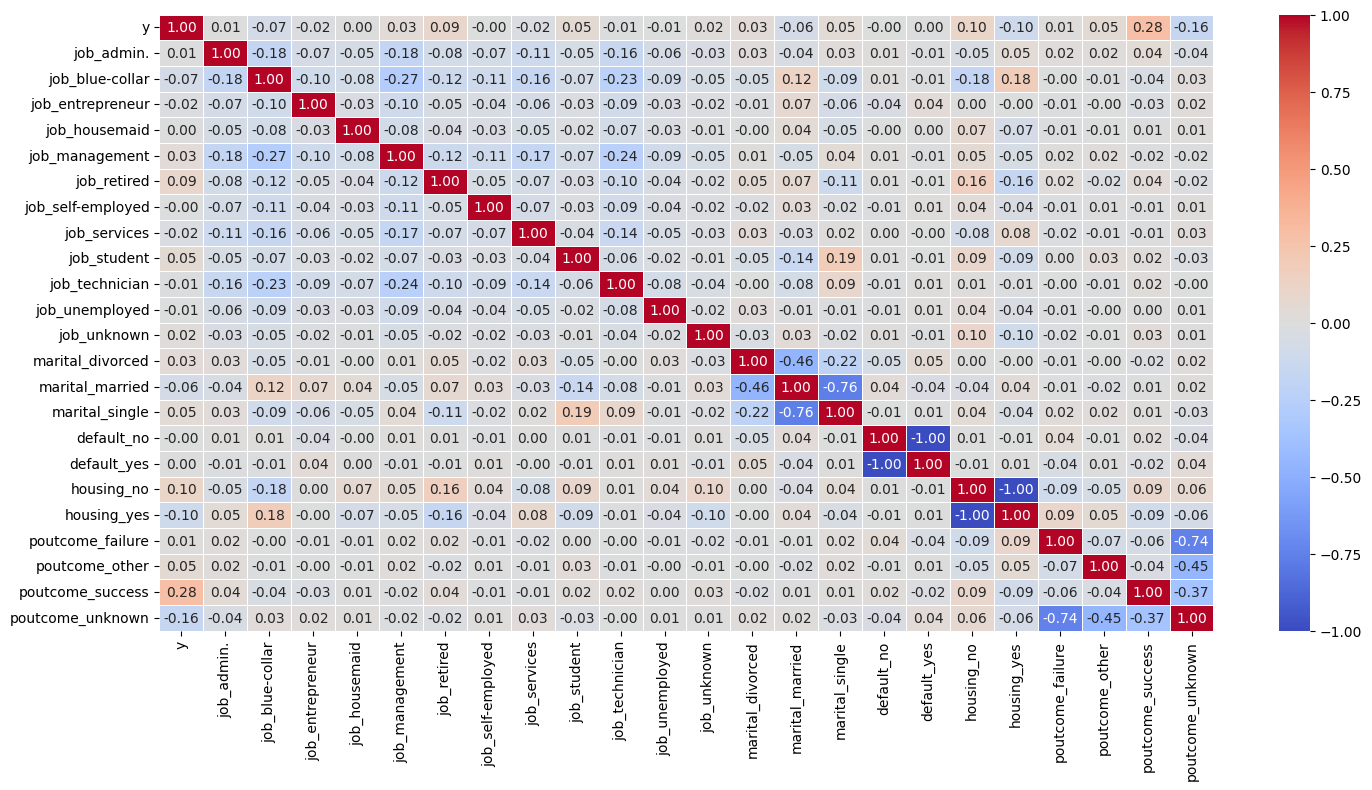

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df3.corr(method='spearman')

plt.figure(figsize=(17,8))
sns.heatmap(data = correlation, annot=True, vmax= 1, vmin= -1, center= 0, linewidth=.5, fmt='.2f',cmap='coolwarm')
# plt.savefig('heatmap.png')
plt.show()

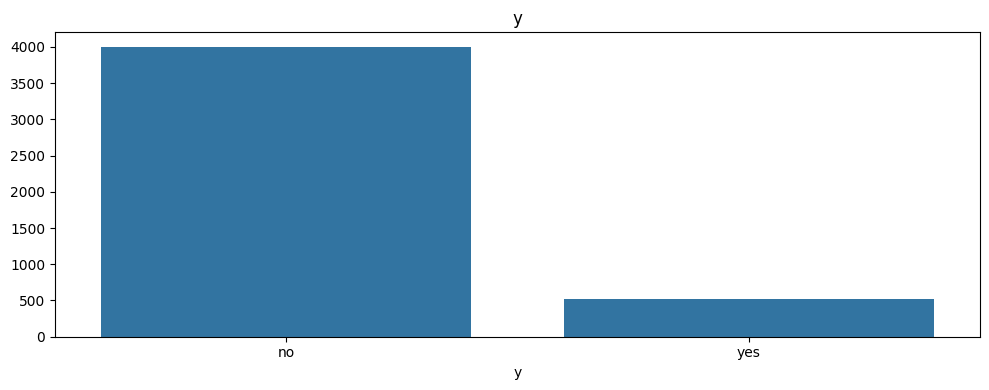

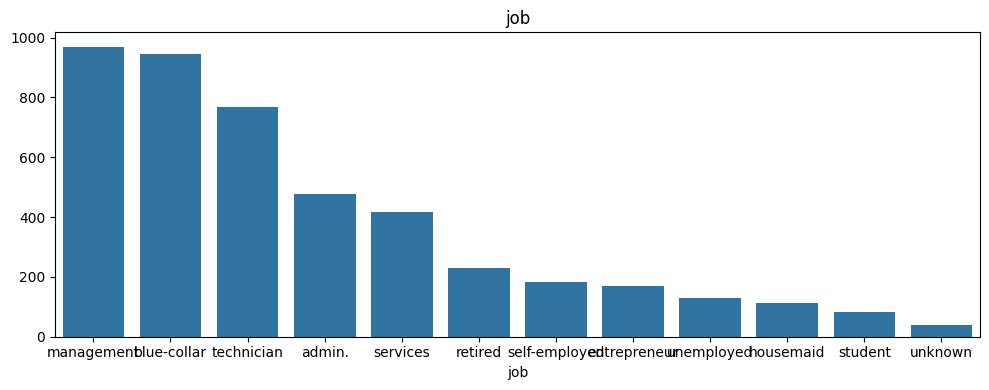

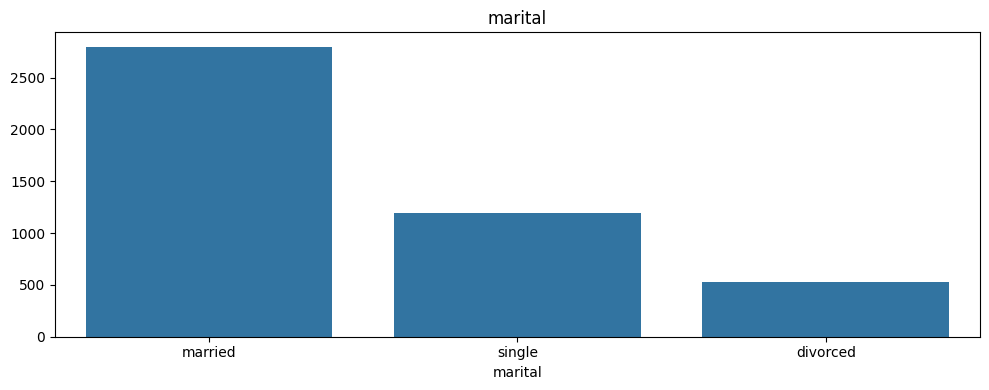

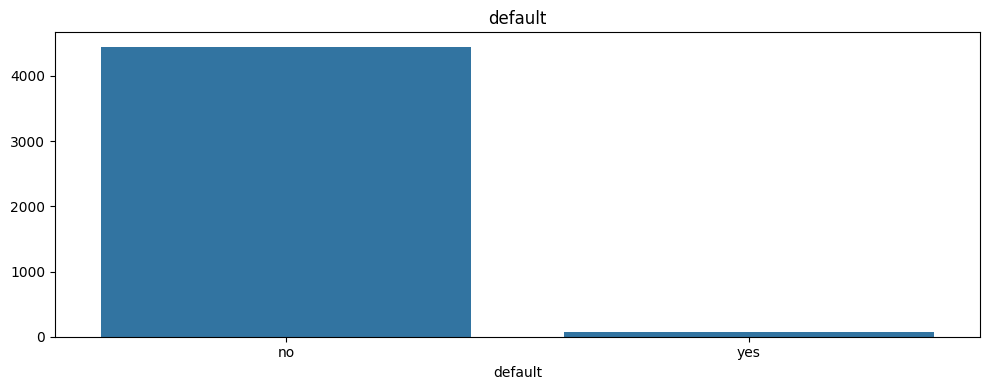

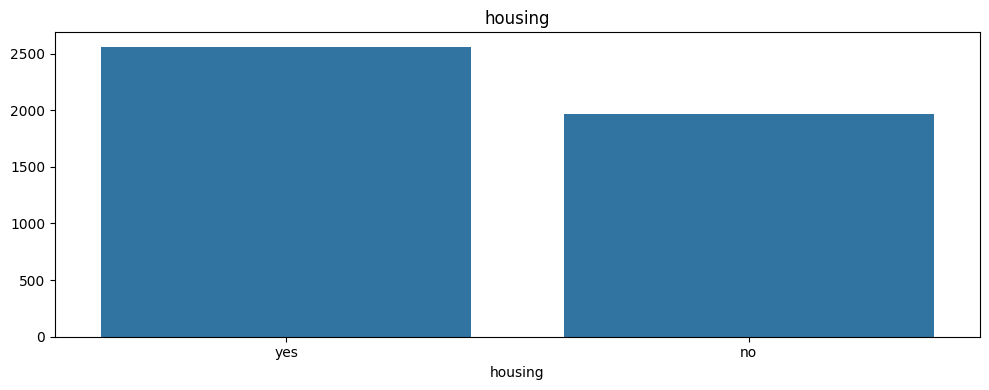

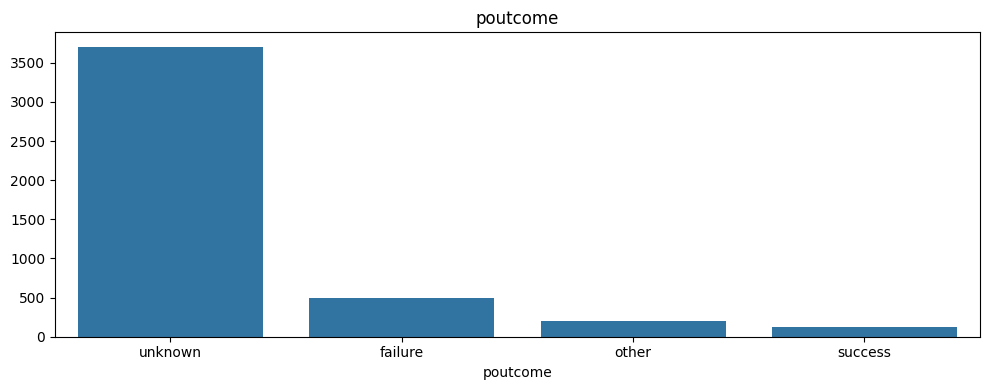

In [23]:
for col in df2:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()
    plt.show()

<font style="color:lightblue"> In heat map we can see that 'y' our target variable has strong correlation with
'job', 'marital', 'default', 'housing', 'poutcome'. 

<font style="color:lightblue">Strong correlations  >= 0.6

In [24]:

matrix = correlation.unstack()
matrix = matrix[abs(matrix) >= 0.6]

matrix



y                  y                    1.000000
job_admin.         job_admin.           1.000000
job_blue-collar    job_blue-collar      1.000000
job_entrepreneur   job_entrepreneur     1.000000
job_housemaid      job_housemaid        1.000000
job_management     job_management       1.000000
job_retired        job_retired          1.000000
job_self-employed  job_self-employed    1.000000
job_services       job_services         1.000000
job_student        job_student          1.000000
job_technician     job_technician       1.000000
job_unemployed     job_unemployed       1.000000
job_unknown        job_unknown          1.000000
marital_divorced   marital_divorced     1.000000
marital_married    marital_married      1.000000
                   marital_single      -0.763919
marital_single     marital_married     -0.763919
                   marital_single       1.000000
default_no         default_no           1.000000
                   default_yes         -1.000000
default_yes        d


### <font style="color:lightblue">5) Select the column called 'y' of df3 as the target variable y, and all the remaining columns for the explanatory variables X.


In [25]:
X = df3.drop('y', axis=1)
y = df3['y'].values



### <font style="color:lightblue">6) Split the dataset into training and testing sets with 75/25  ratio.


In [26]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print(X_test.shape)

(1131, 23)



### <font style="color:lightblue">7) Setup a logistic regression model, train it with training data and predict on testing data.


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



### <font style="color:lightblue">8) Print the confusion matrix (or use heat map if you want) and accuracy score for the logistic regression model.


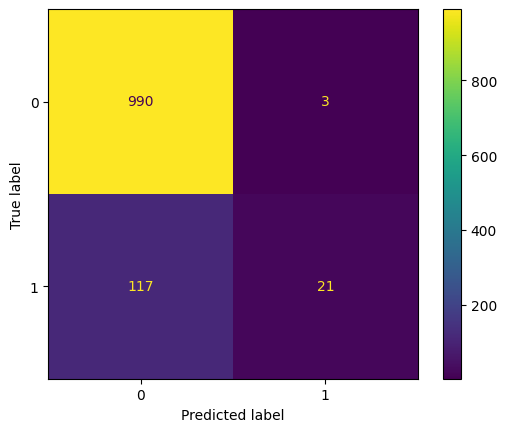

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       993
           1       0.88      0.15      0.26       138

    accuracy                           0.89      1131
   macro avg       0.88      0.57      0.60      1131
weighted avg       0.89      0.89      0.86      1131

Logistic Regression Accuracy Score: 0.8939


In [28]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
# plt.savefig('Logistic_Model.png')
plt.show()

accuracy_logistic = metrics.accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"Logistic Regression Accuracy Score: {accuracy_logistic:.4f}")



### <font style="color:lightblue">9) Repeat steps 7 and 8 for k-nearest neighbors model. Use k=3, for example, or experiment with different values.


In [29]:
'''9.1) Setup KNN classifier, train it with training data and predict on testing data.'''

from sklearn.neighbors import KNeighborsClassifier

# KNN classifier
classifier  = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

y_pred_classifier = classifier.predict(X_test)



==============================KNN classifier
cnf_matrix
 [[991   2]
 [127  11]]


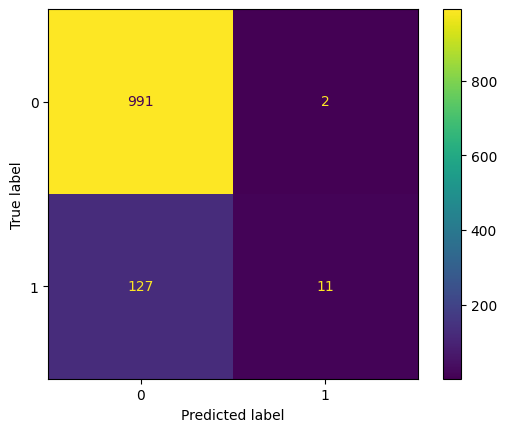

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       993
           1       0.85      0.08      0.15       138

    accuracy                           0.89      1131
   macro avg       0.87      0.54      0.54      1131
weighted avg       0.88      0.89      0.84      1131

K-Nearest Neighbors Accuracy Score: 0.8859


In [30]:
'''9.2) Confusion matrix and accuracy score for the KNN classifier.'''

import numpy as np

cnf_matrix_classifier = metrics.confusion_matrix(y_test, y_pred_classifier)

print('cnf_matrix\n',cnf_matrix_classifier)

metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
# plt.savefig('KNN_Model.png')
plt.show()

accuracy_classifier = metrics.accuracy_score(y_test, y_pred_classifier)
print(classification_report(y_test,  y_pred_classifier))
print(f'K-Nearest Neighbors Accuracy Score: {accuracy_classifier:.4f}')


### <font style="color:lightblue">Lowest Mean Error

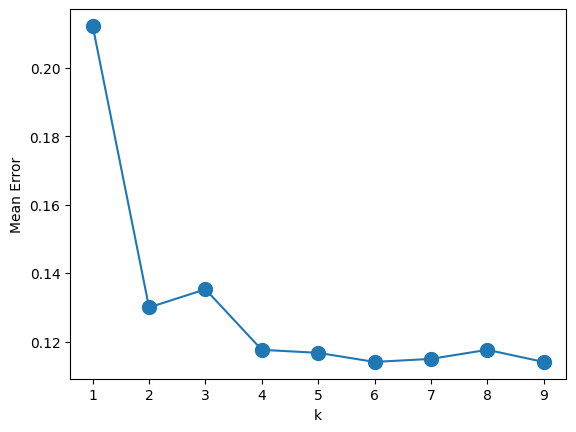

Lowest Mean Error:0.11405835543766578 with value of k: 6


In [31]:

error = []
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))
plt.plot(range(1, 10), error, marker='o', markersize=10)
plt.xlabel('k')
plt.ylabel('Mean Error')
plt.show()

best_k = np.argmin(error) + 1

print(f"Lowest Mean Error:{error[best_k - 1]} with value of k: {best_k}")


## <font style="color:lightblue">10) Compare the results between the two models.

<font style="color:lightblue">

#### logistic regression model
         cnf_matrix
         [[990   3]
         [117  21]]
                     precision    recall  f1-score   support

                  0       0.89      1.00      0.94       993
                  1       0.88      0.15      0.26       138

            accuracy                           0.89      1131
            macro avg       0.88      0.57      0.60      1131
         weighted avg       0.89      0.89      0.86      1131

         Logistic Regression Accuracy Score: 0.8939

#### KNN classifier
         cnf_matrix
         [[991   2]
         [127  11]]
                     precision    recall  f1-score   support

                  0       0.89      1.00      0.94       993
                  1       0.85      0.08      0.15       138

            accuracy                           0.89      1131
            macro avg       0.87      0.54      0.54      1131
         weighted avg       0.88      0.89      0.84      1131

         K-Nearest Neighbors Accuracy Score: 0.8859


* Lowest Mean Error: 0.11405835543766578 with value of k: 6
* Both models have similar accuracy scores ~ 89%, so models overall performance is comparable. The precision for class 1 in both models is ok.
<font/>